In [1]:
import sys
import os
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
from IPython import display
from IPython.display import clear_output
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit
from time import time
# from helpers import *
from PMFBSS import *
# np.random.seed(13)
%load_ext autoreload
%autoreload 2

In [3]:
dim = 4
N = 500000
NumberofSources = dim
NumberofMixtures = 10

signed_dims = np.array([])
nn_dims = np.array([0,1,2,3])
sparse_dims_list = []
(A,b), V = generate_practical_polytope(dim, signed_dims, nn_dims, sparse_dims_list)
S = generate_uniform_points_in_polytope(V, N)

Text(0.5, 0.98, 'Scatter Plot of Source Components')

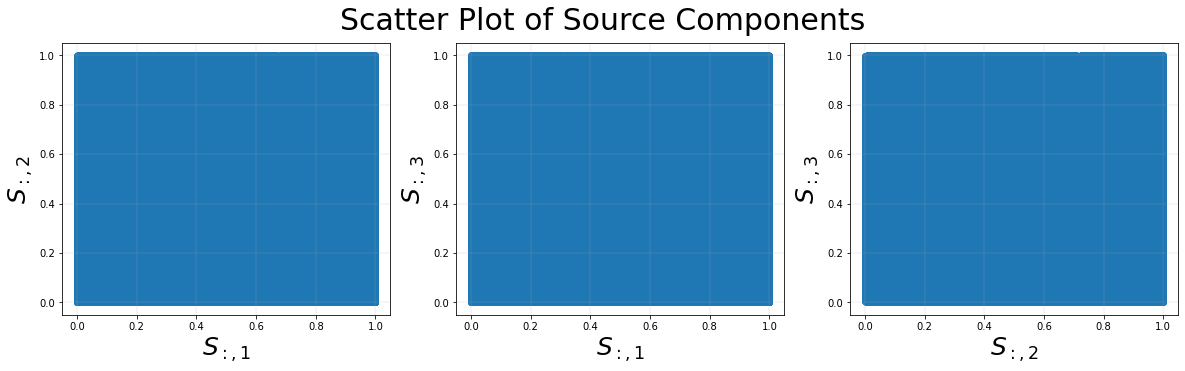

In [4]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.scatter(S[0,:], S[1,:])
plt.xlabel("$S_{:,1}$", fontsize = 25)
plt.ylabel("$S_{:,2}$", fontsize = 25)
plt.grid(linewidth=.2)
plt.subplot(1,3,2)
plt.scatter(S[0,:], S[2,:])
plt.xlabel("$S_{:,1}$", fontsize = 25)
plt.ylabel("$S_{:,3}$", fontsize = 25)
plt.grid(linewidth=.2)
plt.subplot(1,3,3)
plt.scatter(S[1,:], S[2,:])
plt.xlabel("$S_{:,2}$", fontsize = 25)
plt.ylabel("$S_{:,3}$", fontsize = 25)
plt.grid(linewidth=.2)

plt.suptitle("Scatter Plot of Source Components", fontsize = 30)
# plt.savefig('Pex_source_components.pdf', format='pdf', dpi = 1200)

In [5]:
# Generate Mxr random mixing from i.i.d N(0,1)
A = np.random.randn(NumberofMixtures,NumberofSources)
Y = np.dot(A,S)

print("The following is the mixture matrix A")
display_matrix(A)

SNR = 30 # dB
NoiseAmp = (10 ** (-SNR/20))# * np.sqrt(NumberofSources)
NoisePart = NoiseAmp * np.random.randn(Y.shape[0], Y.shape[1])
Y = Y  + NoisePart
SNRinp = 10 * np.log10(np.sum(np.var(Y, axis = 1)) / np.sum(np.var(NoisePart, axis = 1)))
print("Input SNR is : {}".format(SNRinp))

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 24.902701866669446


In [6]:
lambda_ = 1 - 1e-1/10
beta = 30
s_dim = S.shape[0]
y_dim = Y.shape[0]

# Inverse output covariance
B = 5 * np.eye(s_dim)


debug_iteration_point = 1000
model = OnlinePMF(s_dim = s_dim, y_dim = y_dim, muW = 1e-3, lambda_ = lambda_,
                  beta = beta, B = B, neural_OUTPUT_COMP_TOL = 1e-6,
                  set_ground_truth = True, Sgt = S, A = A)

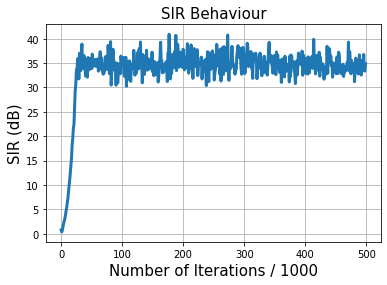

100%|█████████████████████████████████| 500000/500000 [02:08<00:00, 3901.06it/s]


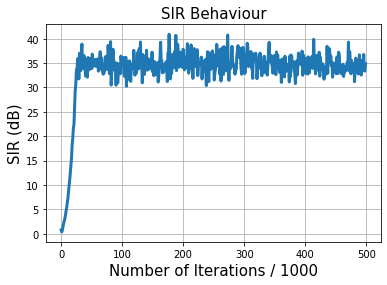

In [7]:
model.fit_batch_general_polytope(Y = Y, signed_dims = signed_dims, nn_dims = nn_dims,
                                sparse_dims_list = sparse_dims_list,n_epochs = 1, 
                                neural_dynamic_iterations = 500, plot_in_jupyter = True,
                                neural_lr_start = 0.1, neural_lr_stop = 1e-10,
                                debug_iteration_point = debug_iteration_point, 
                                shuffle = True)